<h1> Basic scikit-learn kNN, logistic_regression and logistic_regression_CV classifiers comparison

In this notebook we will compare some basic ML algorithms in scikit-learn (sklearn) library. These are kNN, logistic_regression and logistic_regression_CV classifiers. We will also compare results with and out of standardizing of input features.

First of all we need a dataset. We will consider the dataset from <a href='kaggle.com'>kaggle.com</a>. We will take it from 'Credit Card fraud detection' competition. The dataset is already in our directory.

Let's import libraries and functions that we will use.

In [35]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from math import floor, sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, recall_score, precision_score, accuracy_score, RocCurveDisplay, roc_curve, auc
from matplotlib import pyplot as plt
from time import time

Let's see what's inside the dataset.

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
187459,127543.0,-2.071349,-0.567554,-0.745598,-0.795516,0.320330,-1.417139,1.745028,0.136200,-0.323500,...,0.567134,0.535173,0.359162,-0.248211,0.581084,-0.305923,-0.146315,-0.040144,349.75,0
277886,167919.0,2.084263,-0.929668,-0.340700,-1.623063,-0.972567,-0.200155,-1.123848,0.041546,2.667240,...,0.182916,0.859964,0.041462,-0.941612,-0.177893,-0.118940,0.072709,-0.038178,8.49,0
88588,62203.0,1.234865,-0.626249,0.553079,-0.295193,-1.008043,-0.228296,-0.657228,-0.033932,-1.071419,...,-0.117804,0.068995,-0.130753,0.061691,0.355819,0.655341,-0.010199,0.017423,60.00,0
60046,49131.0,0.092937,1.538071,0.757766,2.799238,0.697949,-0.564306,1.194055,-0.514176,-1.441387,...,0.114385,0.714501,0.021460,0.437878,-1.013480,0.053279,0.200814,0.085683,1.13,0
258015,158450.0,-0.357100,0.108503,0.028630,0.770772,0.334449,0.562273,1.663056,-0.193775,0.510530,...,0.311824,1.000651,0.085312,0.384670,0.487199,-0.344486,-0.123282,-0.123352,249.51,0
212449,138859.0,-4.201090,2.035542,-0.196243,-0.491993,-1.005945,0.048531,-1.805465,-2.806161,0.905330,...,3.317027,-1.699884,1.139303,-0.171724,0.097843,0.106771,0.686533,-0.218870,19.99,0
25006,33475.0,-0.864070,0.811388,2.340264,0.090845,0.440272,-1.114984,1.026813,-0.310005,-0.531979,...,-0.182996,-0.539917,-0.155467,0.668429,0.323482,-0.760240,-0.130929,-0.142354,9.99,0
195238,130963.0,-10.905621,-1.319586,-4.655558,-2.275695,-0.414983,-2.257399,2.670828,-2.025140,6.398377,...,-1.888150,0.536034,-1.453270,0.292630,0.582631,-0.515114,-2.110110,5.393265,111.49,0
277270,167561.0,-0.653968,1.624992,-1.276499,-0.898748,0.978263,0.146188,0.262078,-0.264269,-0.241602,...,0.443125,-1.096865,0.164927,-0.317227,-0.249370,0.160729,0.243665,0.069742,9.99,0
59920,49070.0,-0.910585,-4.294699,-1.042341,0.579569,-2.376870,-0.999238,1.240901,-0.574747,-0.764972,...,0.893085,-0.131533,-1.133098,1.012835,0.243418,-0.221579,-0.240656,0.214064,1200.00,0


In this dataset we have lots of transactions and their categories.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

So, we see that there are many features: v1, .., v28, time and amount. v-features are some features that we cannot show here due to privacy policy, 'amount' is amount of transactions in conventional units and 'time' is time of a transaction counted from a particular moment.

Class is a target variable. If it is 0, then the transaction is not criminal, and criminal otherwise.

In [4]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We see that this dataset is unbalanced with '0' and '1' classes. We need to somehow fix it.

We will fix that using SMOTE (Synthetic Minority Oversampling Technique) algorithm.

In [5]:
X, y = dataset.drop(['Class'], axis=1), dataset[['Class']]
class_1_cnt = y.value_counts().iloc[1]
smote = SMOTE(k_neighbors=floor(sqrt(class_1_cnt)))
#print(X.shape, y.shape)
X_smote, y_smote = smote.fit_resample(X, y)
#print(X_smote.shape, y_smote.shape)

In [34]:
y_smote.value_counts()

Class
0        284315
1        284315
dtype: int64

Now we have balanced '0' and '1' classes. We can use ML models to predict fraudulent transactions.

We will define function that will do most of the work itself.

In [36]:
def model_info(data: list, model):
    start_time = time()
    X_train, X_test, y_train, y_test = data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"accuracy score = {accuracy_score(y_test, y_pred)}.")
    print(f"mean squared error = {mean_squared_error(y_test, y_pred)}.")
    print(f"recall score = {recall_score(y_test, y_pred)}.")
    print(f"precision score = {precision_score(y_test, y_pred)}.")
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    display_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display_curve.plot()
    plt.show()
    print(f"it took {time() - start_time} seconds to build a model.")

<h2> Algorithms without standartizing.

Let's divide X and y into train and test sets.

In [37]:
train_test_data_no_std = train_test_split(X_smote, y_smote, test_size=0.3)

<h3> kNN algorithm.

/home/matthew/Desktop/python notebooks/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy score = 0.725017439576995.
mean squared error = 0.274982560423005.
recall score = 0.6691896338955162.
precision score = 0.7521532364597093.


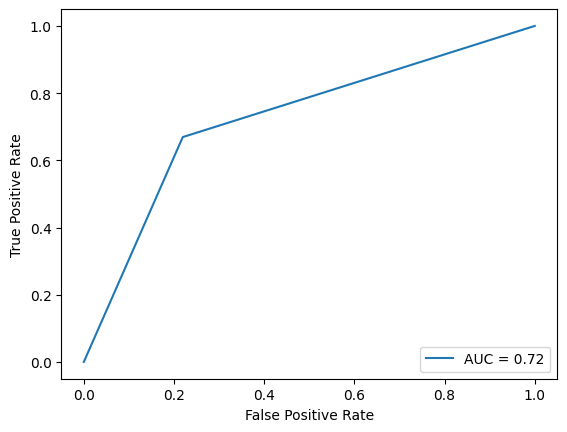

it took 77.58524489402771 seconds to build a model.


In [38]:
from sklearn.neighbors import KNeighborsClassifier

opt_n_neighbors = floor(sqrt(X_smote.shape[0]))
kNN_no_std = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
model_info(train_test_data_no_std, kNN_no_std)

<h3> Logistic_regression algorithm.

/home/matthew/Desktop/python notebooks/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score = 0.9719618498261904.
mean squared error = 0.028038150173809565.
recall score = 0.9625067709191965.
precision score = 0.9808128442348537.


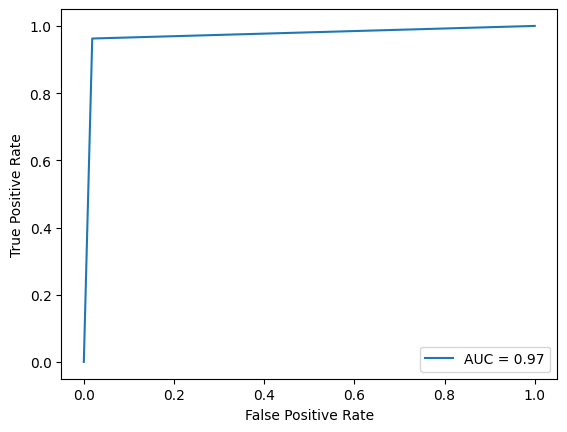

it took 3.164626121520996 seconds to build a model.


In [39]:
from sklearn.linear_model import LogisticRegression

log_regr_no_std = LogisticRegression(max_iter=200)
model_info(train_test_split(X_smote, y_smote, test_size=0.3), log_regr_no_std)

<h3> Logistic_regression_CV algorithm

/home/matthew/Desktop/python notebooks/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score = 0.9692418620192392.
mean squared error = 0.030758137980760776.
recall score = 0.9499206675677264.
precision score = 0.9879476836572546.


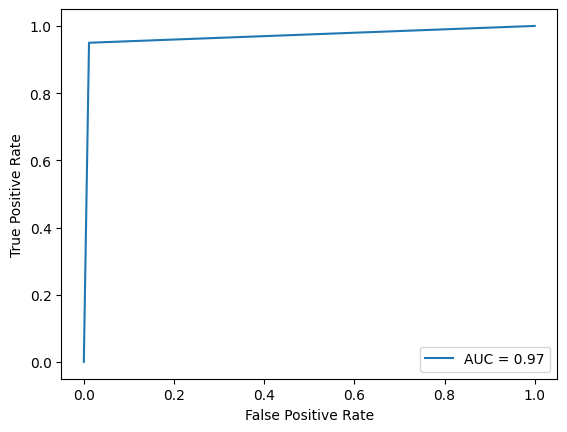

it took 14.68151044845581 seconds to build a model.


In [40]:
from sklearn.linear_model import LogisticRegressionCV

log_regr_CV_no_std = LogisticRegressionCV(max_iter=200)
model_info(train_test_data_no_std, log_regr_CV_no_std)

So, we see that both Logistic_regressions are better than kNN: they are faster and more precise.

<h2> Algorithms with standardizing

<h3> Standardizing

Let's standardize input data with StandardScaler.

In [41]:
data_scaler = StandardScaler()
data_scaler.fit(X_smote)
X_std = data_scaler.transform(X_smote)

Let's divide dataset.

In [42]:
train_test_data_std = train_test_split(X_std, y_smote, test_size=0.3)

<h3> kNN algorithm

/home/matthew/Desktop/python notebooks/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy score = 0.9799928483079213.
mean squared error = 0.02000715169207862.
recall score = 0.97658984659478.
precision score = 0.9832073887489504.


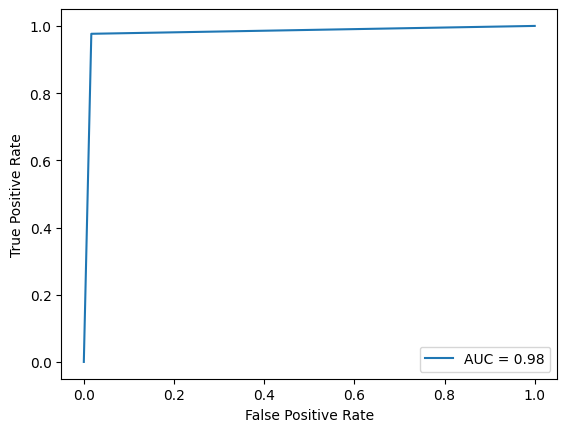

it took 77.1723268032074 seconds to build a model.


In [43]:
kNN_std = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
model_info(train_test_data_std, kNN_std)

<h3> Logistic_regression algorithm

/home/matthew/Desktop/python notebooks/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score = 0.9801159512043567.
mean squared error = 0.01988404879564333.
recall score = 0.9684614842483614.
precision score = 0.9914979075472605.


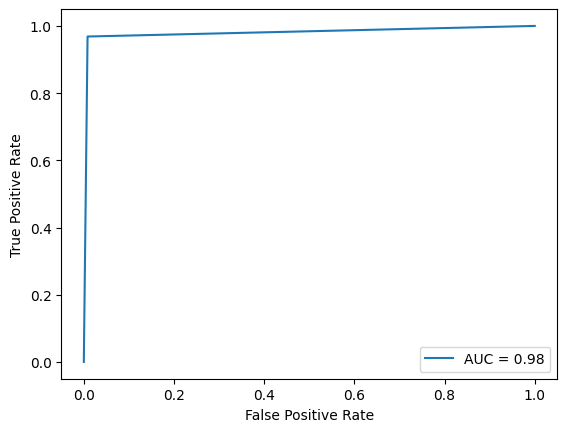

it took 5.81645393371582 seconds to build a model.


In [44]:
log_regr_std = LogisticRegression(max_iter=200)
model_info(train_test_data_std, log_regr_std)

<h3> Logistic_regression_CV

/home/matthew/Desktop/python notebooks/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score = 0.9804149153814138.
mean squared error = 0.019585084618586192.
recall score = 0.9689900627246458.
precision score = 0.9915740128613498.


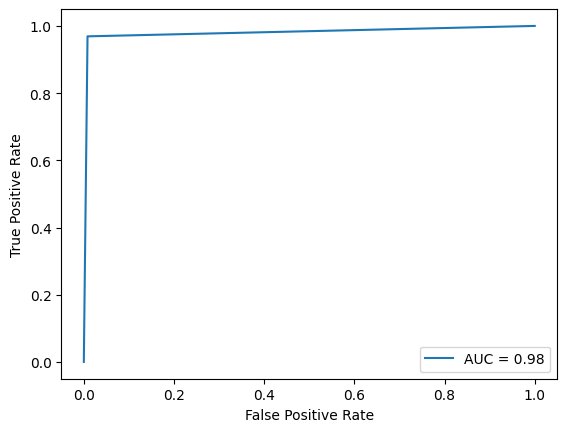

it took 56.43696165084839 seconds to build a model.


In [45]:
log_regr_CV_std = LogisticRegressionCV(max_iter=200)
model_info(train_test_data_std, log_regr_CV_std)

Now we can see that all the models are quite precise at finding fraudulent transactions. And we have only standardized input features! That means that standardizing can help to predict some events more precisely.

<h2> Conclusion

We considered three models and tested their ability to predict fraudulent transactions. We saw that standardizing data is very import step in building precise model. Also, we saw that both Logistic_regression algorithm were quite better than kNN. So we can suppose that Logistic_regression is a better algorithm in such type of work. And in practice companies usually use this algorithm.